# Temporal-Difference Methods

In this notebook, you will write your own implementations of many Temporal-Difference (TD) methods.

While we have provided some starter code, you are welcome to erase these hints and write your code from scratch.

---

### Part 0: Explore CliffWalkingEnv

We begin by importing the necessary packages.

In [1]:
import sys
import gym
import numpy as np
from collections import defaultdict, deque
import matplotlib.pyplot as plt
%matplotlib inline

import check_test
from plot_utils import plot_values

Use the code cell below to create an instance of the [CliffWalking](https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py) environment.

In [2]:
env = gym.make('CliffWalking-v0')

The agent moves through a $4\times 12$ gridworld, with states numbered as follows:
```
[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
```
At the start of any episode, state `36` is the initial state.  State `47` is the only terminal state, and the cliff corresponds to states `37` through `46`.

The agent has 4 potential actions:
```
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
```

Thus, $\mathcal{S}^+=\{0, 1, \ldots, 47\}$, and $\mathcal{A} =\{0, 1, 2, 3\}$.  Verify this by running the code cell below.

In [3]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


In this mini-project, we will build towards finding the optimal policy for the CliffWalking environment.  The optimal state-value function is visualized below.  Please take the time now to make sure that you understand _why_ this is the optimal state-value function.

_**Note**: You can safely ignore the values of the cliff "states" as these are not true states from which the agent can make decisions.  For the cliff "states", the state-value function is not well-defined._

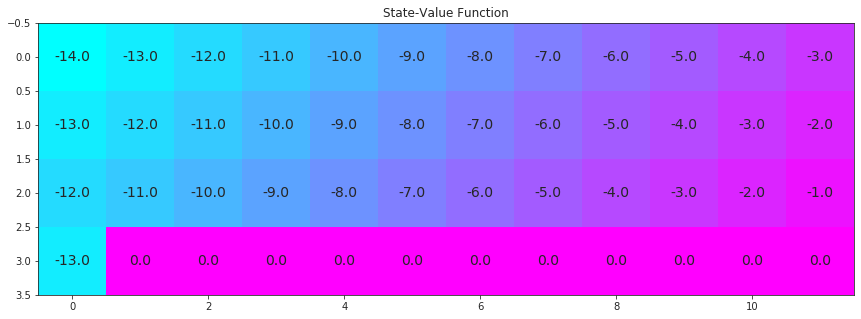

In [4]:
# define the optimal state-value function
V_opt = np.zeros((4,12))
V_opt[0:13][0] = -np.arange(3, 15)[::-1]
V_opt[0:13][1] = -np.arange(3, 15)[::-1] + 1
V_opt[0:13][2] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

plot_values(V_opt)

### Part 1: TD Control: Sarsa

In this section, you will write your own implementation of the Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [ ]:
import random


def sarsa(env, num_episodes, alpha, gamma=1.0):
    # initialize action-value function (empty dictionary of arrays)
    Q = defaultdict(lambda: np.zeros(env.nA))
    # initialize performance monitor
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        epsilon = max(0.2, 1.0*(1-(i_episode/num_episodes)))
        
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}, epsilon: {}".format(i_episode, num_episodes, epsilon), end="")
            sys.stdout.flush()   
        
        ## TODO: complete the function'
        state = env.reset()
        done = False
        while not done:
            #calculate an action
            rand = random.uniform(0, 1)
            if rand < epsilon:
                action_0 = np.random.choice(np.arange(env.nA))
            else:
                action_0 = np.argmax(Q[state])
            
            state_0, reward_0, done, info = env.step(action_0)
            if done:
                break
            #print("next_state: {}, reward: {}, done: {}, info: {}".format(next_state, reward, done, info))

            #take the next action (use greedy)
            action_1 = np.argmax(Q[state_0])
            state_1, reward_1, done, info = env.step(action_1)
            
            #update the Q value of the previous(current) state
            current_state_action_reward = Q[state][action_0]
            Q[state][action_0] = \
                (1-alpha)*current_state_action_reward + alpha*(reward_0 + reward_1)
            
            state = state_1

    return Q

Q = sarsa(env, 1000, .04)

print("")
keys = sorted(Q.keys())
for key in keys:
    print("state: {}, rewards: {}".format(key, Q[key]))
    
# UP = 0
# RIGHT = 1
# DOWN = 2
# LEFT = 3

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 5000/5000, epsilon: 0.21999999999999997

**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  1  2  1  1  1  1  2  1  2  2  2]
 [ 1  2  1  1  1  1  2  1  1  1  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


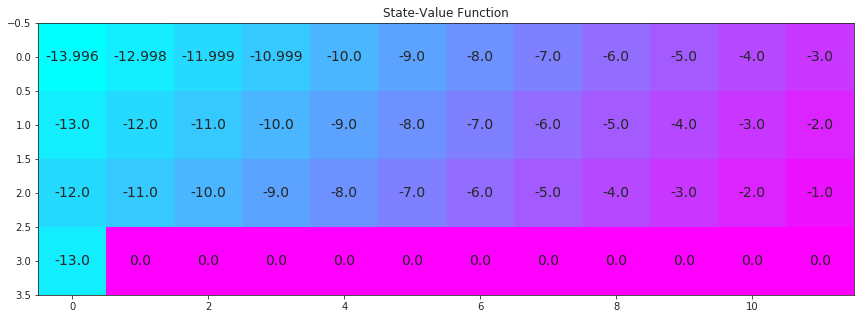

In [10]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsa = sarsa(env, 5000, .01)

# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)

### Part 2: TD Control: Q-learning

In this section, you will write your own implementation of the Q-learning control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [7]:
import random

def q_learning(env, num_episodes, alpha, gamma=1.0):
    # initialize action-value function (empty dictionary of arrays)
    Q = defaultdict(lambda: np.zeros(env.nA))
    # initialize performance monitor
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        epsilon = max(0.2, 1.0*(1-(i_episode/num_episodes)))
        
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}, epsilon: {}".format(i_episode, num_episodes, epsilon), end="")
            sys.stdout.flush()   
        
        ## TODO: complete the function'
        state = env.reset()
        done = False
        while not done:
            #calculate an action
            rand = random.uniform(0, 1)
            if rand < epsilon:
                action = np.random.choice(np.arange(env.nA))
            else:
                action = np.argmax(Q[state])
            
            next_state, reward, done, info = env.step(action)
            #print("next_state: {}, reward: {}, done: {}, info: {}".format(next_state, reward, done, info))

            #get best reward possible from next state
            next_state_max_reward_action = np.argmax(Q[next_state])
            next_state_max_reward = Q[next_state][next_state_max_reward_action]

            #update the Q value of the previous(current) state
            current_state_action_reward = Q[state][action]
            Q[state][action] = \
                (1-alpha)*current_state_action_reward + alpha*(reward + next_state_max_reward)
            
            state = next_state

    return Q

Q = q_learning(env, 10000, .04)

print("")
keys = sorted(Q.keys())
for key in keys:
    print("state: {}, rewards: {}".format(key, Q[key]))
    
# UP = 0
# RIGHT = 1
# DOWN = 2
# LEFT = 3

Episode 10000/10000, epsilon: 0.2999999999999996
state: 0, rewards: [-15. -14. -14. -15.]
state: 1, rewards: [-14. -13. -13. -15.]
state: 2, rewards: [-13. -12. -12. -14.]
state: 3, rewards: [-12. -11. -11. -13.]
state: 4, rewards: [-11. -10. -10. -12.]
state: 5, rewards: [-10.  -9.  -9. -11.]
state: 6, rewards: [ -9.  -8.  -8. -10.]
state: 7, rewards: [-8. -7. -7. -9.]
state: 8, rewards: [-7. -6. -6. -8.]
state: 9, rewards: [-6. -5. -5. -7.]
state: 10, rewards: [-5. -4. -4. -6.]
state: 11, rewards: [-4. -4. -3. -5.]
state: 12, rewards: [-15. -13. -13. -14.]
state: 13, rewards: [-14. -12. -12. -14.]
state: 14, rewards: [-13. -11. -11. -13.]
state: 15, rewards: [-12. -10. -10. -12.]
state: 16, rewards: [-11.  -9.  -9. -11.]
state: 17, rewards: [-10.  -8.  -8. -10.]
state: 18, rewards: [-9. -7. -7. -9.]
state: 19, rewards: [-8. -6. -6. -8.]
state: 20, rewards: [-7. -5. -5. -7.]
state: 21, rewards: [-6. -4. -4. -6.]
state: 22, rewards: [-5. -3. -3. -5.]
state: 23, rewards: [-4. -3. -2. -4

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function. 

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 5000/5000, epsilon: 0.21999999999999997

**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 2  1  1  1  2  1  2  2  2  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


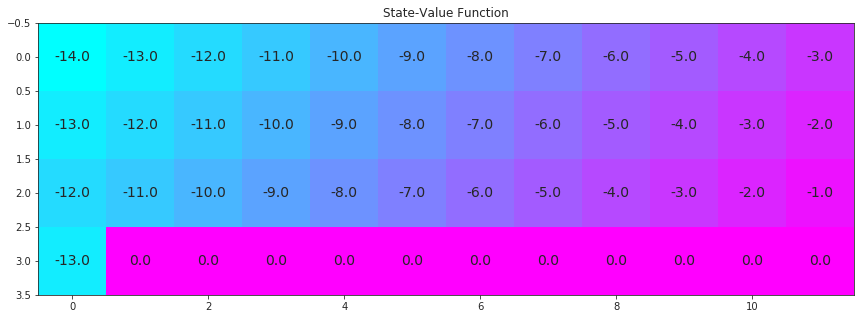

In [8]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsamax = q_learning(env, 5000, .02)

# print the estimated optimal policy
policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape((4,12))
check_test.run_check('td_control_check', policy_sarsamax)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)

# plot the estimated optimal state-value function
plot_values([np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)])

### Part 3: TD Control: Expected Sarsa

In this section, you will write your own implementation of the Expected Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [39]:

import random

def expected_sarsa(env, num_episodes, alpha, gamma=1.0):
    # initialize action-value function (empty dictionary of arrays)
    Q = defaultdict(lambda: np.zeros(env.nA))
    # initialize performance monitor
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        epsilon = max(0.0, 1.0*(1.0-(i_episode/num_episodes)))
        
        # monitor progress
        if i_episode % 10 == 0:
            print("\rEpisode {}/{}, epsilon: {}".format(i_episode, num_episodes, epsilon), end="")
            sys.stdout.flush()   
        
        ## TODO: complete the function'
        state = env.reset()
        done = False
        while not done:
            #calculate an action
            rand = random.uniform(0, 1)
            if rand < epsilon:
                action = np.random.choice(np.arange(env.nA))
            else:
                action = np.argmax(Q[state])
            
            next_state, reward, done, info = env.step(action)
            #print("next_state: {}, reward: {}, done: {}, info: {}".format(next_state, reward, done, info))

            #get best reward possible from next state
#             next_state_max_reward_action = np.argmax(Q[next_state])
#             next_state_max_reward = Q[next_state][next_state_max_reward_action]
            #generate next_state_max_reward based upon probabilities of next actions
            next_state_max_index = np.argmax(Q[next_state])
            next_state_weighted_reward = 0
            
#             rand = random.uniform(0, 1)
#             if rand < epsilon:
# #                 for next_action_index in range(env.nA):
# #                     next_state_weighted_reward += (Q[next_state][next_action_index] / env.nA)'
#                 rand_action = np.random.choice(np.arange(env.nA))
#                 next_state_weighted_reward = Q[next_state][rand_action]    
#             else:
#                 next_state_weighted_reward = Q[next_state][next_state_max_index]    
            rand_action = np.random.choice(np.arange(env.nA))
            next_state_weighted_reward += epsilon * Q[next_state][rand_action] / env.nA
            next_state_weighted_reward += (1.0-epsilon) * Q[next_state][next_state_max_index] 
            
            #next_state_weighted_reward = Q[next_state][next_state_max_index] 
            #print("{} - {}".format(next_state_weighted_reward, Q[next_state]))
            
            #update the Q value of the previous(current) state
            current_state_action_reward = Q[state][action]
            Q[state][action] = \
                (1-alpha)*current_state_action_reward + alpha*(reward + next_state_weighted_reward)
            
            state = next_state

    return Q

Q = expected_sarsa(env, 10000, .04)

print()
keys = sorted(Q.keys())
for key in keys:
    print("state: {}, rewards: {}".format(key, Q[key]))
    
# UP = 0
# RIGHT = 1
# DOWN = 2
# LEFT = 3

Episode 10000/10000, epsilon: 0.010000000000000009
state: 0, rewards: [-11.19216464 -11.21070364 -11.22118442 -11.20211127]
state: 1, rewards: [-10.75063005 -10.74129132 -10.78543601 -10.77020423]
state: 2, rewards: [-10.12613844 -10.13409404 -10.15896506 -10.16337335]
state: 3, rewards: [-9.4465631  -9.44784059 -9.47097314 -9.46094954]
state: 4, rewards: [-8.72227666 -8.71103811 -8.73772988 -8.74104803]
state: 5, rewards: [-7.93633347 -7.94113959 -7.96347065 -7.97060325]
state: 6, rewards: [-7.16323951 -7.1529291  -7.15037649 -7.15992603]
state: 7, rewards: [-6.33936928 -6.3427328  -6.34180433 -6.33760283]
state: 8, rewards: [-5.51419137 -5.50969735 -5.50605364 -5.55132544]
state: 9, rewards: [-4.6560232  -4.66054869 -4.66571893 -4.70245499]
state: 10, rewards: [-3.80928165 -3.80439299 -3.80591884 -4.09354459]
state: 11, rewards: [-3.1493888  -3.15461852 -2.93744656 -3.52809045]
state: 12, rewards: [-11.64306492 -11.65645568 -11.65352925 -11.66540771]
state: 13, rewards: [-11.0361589 

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 10000/10000, epsilon: 0.010000000000000009

**<span style="color: red;">PLEASE TRY AGAIN</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  1  0  1  1  1  2  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 1  1  1  1  0  0  0  0  0  0  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


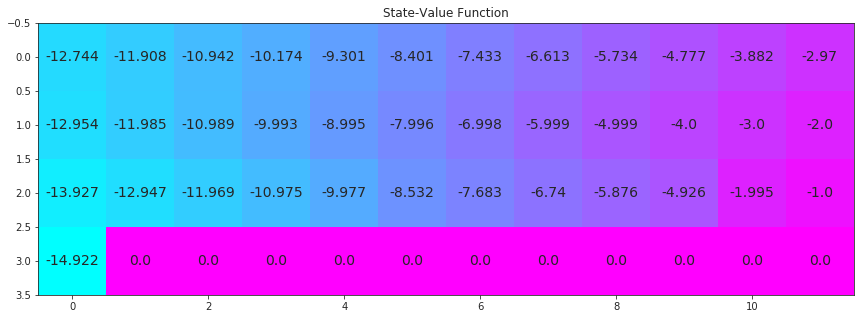

In [40]:
# obtain the estimated optimal policy and corresponding action-value function
Q_expsarsa = expected_sarsa(env, 10000, 1)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])